Test PCA from built-in Wine Dataset of SkLearn

In [46]:
plt.style.use('ggplot')

Model Implementation

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

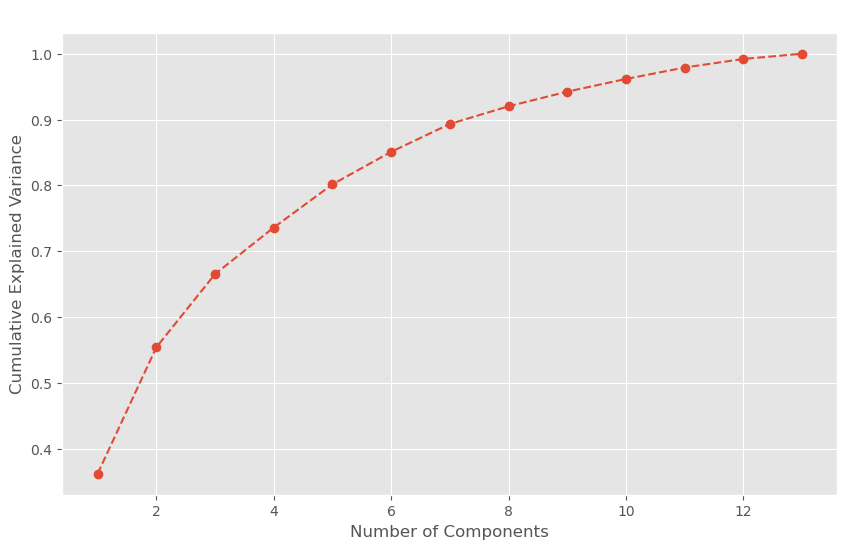

In [48]:

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Number of Components vs. Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


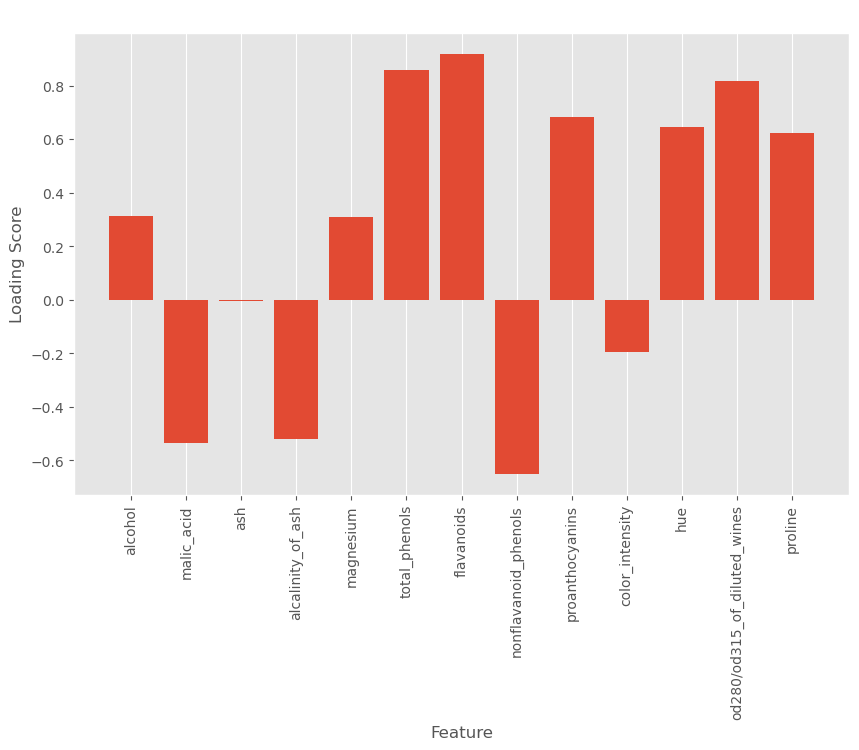

In [49]:
# Get the loading scores
loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), loading_scores[:, 0], tick_label=feature_names)
plt.title('Loading Scores for PC1')
plt.xlabel('Feature')
plt.ylabel('Loading Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

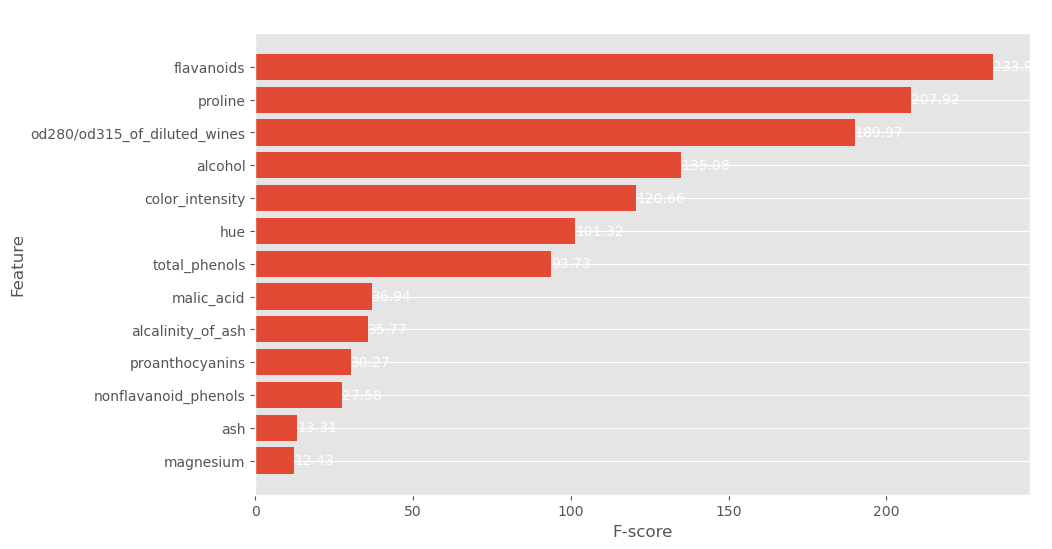

In [50]:
from sklearn.feature_selection import f_classif

# Calculate the F-scores for each feature
f_scores, _ = f_classif(X_scaled, y)

# Get the feature names sorted by F-score
sorted_indices = np.argsort(f_scores)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_f_scores = f_scores[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_f_scores, tick_label=sorted_feature_names)
plt.title('F-scores for Wine Dataset Features')
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.grid(axis='x')

# Annotate bars with their F-score values
for i, score in enumerate(sorted_f_scores):
    plt.text(score + 0.01, i, f'{score:.2f}', va='center',color="black")

plt.gca().invert_yaxis()  # Invert y-axis to have the highest F-score at the top
plt.show()

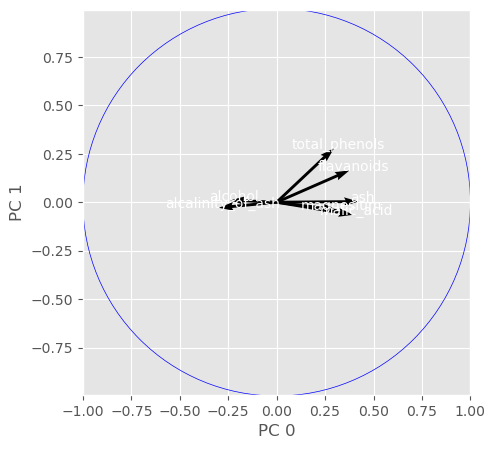

In [51]:
 pc_x: int = 0
 pc_y: int = 1
 num_dims: int = 5
# Get the PCA components (loadings)
PCs = pca.components_
    
PC_x_index = PCs[pc_x, : ].argsort()[-num_dims:][::-1]
PC_y_index = PCs[pc_y, : ].argsort()[-num_dims:][::-1]
combined_index = set(list(PC_x_index) + list(PC_y_index))
PCs = PCs[:, list(combined_index)]
# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
PCs[pc_x,:], PCs[pc_y,:], 
angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = df.columns
for i,j,z in zip(PCs[pc_y,:]+0.02, PCs[pc_x,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC ' + str(pc_x))
plt.ylabel('PC ' + str(pc_y))
plt.show()              